In [1]:
pip install -r req.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load Dataset
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Step 2: Data Preprocessing
# Handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [4]:
# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Normalize numeric features
scaler = StandardScaler()
data[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(
    data[['MonthlyCharges', 'TotalCharges', 'tenure']]
)


In [5]:
# Step 3: Clustering with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data[['MonthlyCharges', 'tenure', 'Contract']])

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(reduced_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Evaluate clustering
silhouette_avg = silhouette_score(reduced_features, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.45031709975664475


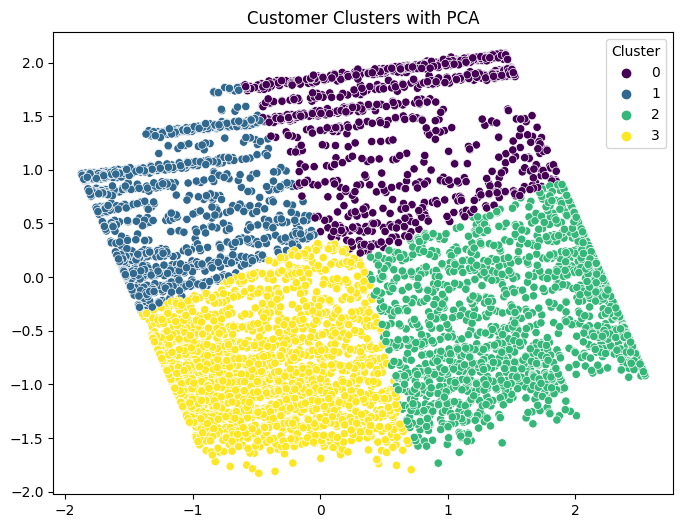

In [7]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data['Cluster'], palette='viridis'
)
plt.title('Customer Clusters with PCA')
plt.show()

In [8]:
# Step 4: Advanced Classification
# Define features and target
target = 'Churn'
X = data.drop(columns=['Churn', 'customerID', 'Cluster'])
X['Cluster'] = data['Cluster']
y = data[target]


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC Score: 0.8388962497541587


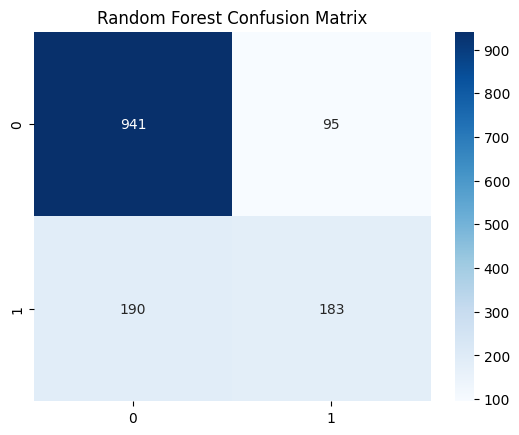


Classifier: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC Score: 0.8595740991853592


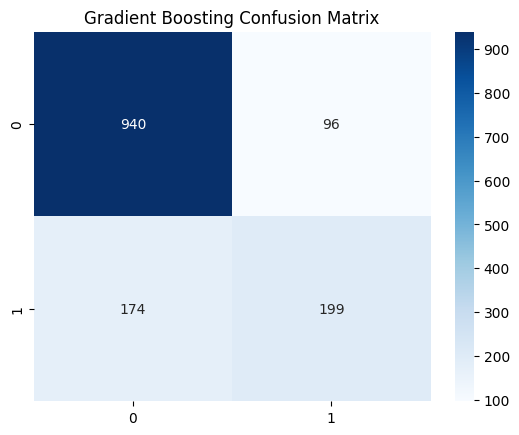

In [10]:
# Multiple Classifiers Pipeline
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\nClassifier: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))

    # Confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

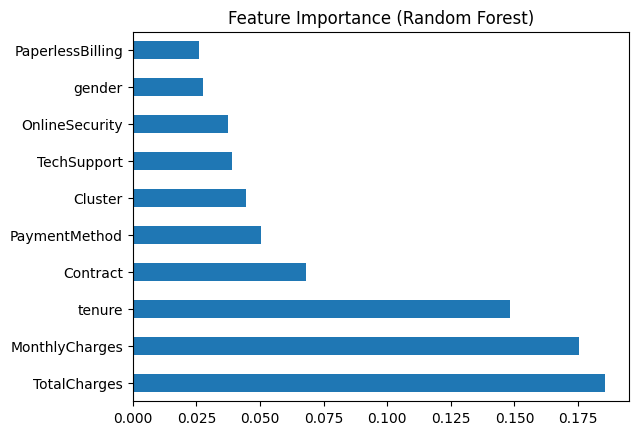

In [11]:
# Feature importance for Random Forest
rf = classifiers['Random Forest']
rf.fit(X_train, y_train)
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [12]:
# Step 5: Deployment (Streamlit Example)
# Save the trained models and clustering results for deployment
import joblib
joblib.dump(classifiers['Random Forest'], 'rf_churn_model.pkl')
joblib.dump(kmeans, 'customer_clusters.pkl')
joblib.dump(pca, 'pca_transform.pkl')

['pca_transform.pkl']